<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/Model/Ensemble_Trees_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [34]:
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week06/Data/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(fpath)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


#Train Test Split

In [35]:
#Stating feature and target
X = df.drop(columns="PRICE")
y = df["PRICE"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT
182,0.09103,0.4880,7.155,92.2,17.8,4.82
155,3.53501,0.8710,6.152,82.6,14.7,15.02
280,0.03578,0.4429,7.820,64.5,14.9,3.76
126,0.38735,0.5810,5.613,95.6,19.1,27.26
329,0.06724,0.4600,6.333,17.2,16.9,7.34


# Decision Tree

In [37]:
#Instantiate Decision Tree
dec_tree = DecisionTreeRegressor(random_state=42)

## Fit the model using your training data

In [38]:
#Fit our training data to the Decision Tree Regressor
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

## Predict the target values for the training set and the test set

In [39]:
#Predictions on X_train and test
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

## Depth of Tree


In [40]:
dec_tree.get_depth()

20

##For Loop, Decision Tree

In [41]:
#Stating the depth to iterate
depths = list(range(2,20))
#Creating dateframe with 2 columns
scores = pd.DataFrame(columns=["Train Score", "Test Score"])
#Iterate thru depths to find optimal depth
for depth in depths:
    #Instantiate Decision Tree
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    #Fit training to dec tree
    dec_tree.fit(X_train, y_train)
    #Predict
    train_preds = dec_tree.predict(X_train)
    test_preds = dec_tree.predict(X_test)
    # Scores
    train_score = r2_score(y_train, train_preds)
    test_score = r2_score(y_test, test_preds)
    #Calcuate R2 score
    scores.loc[depth, "Train Score"] = train_score
    scores.loc[depth, "Test Score"] = test_score
    #Print results
    print(f"When the depth is: {depth}")
    print(f" - the training score: {train_score.round(3)}.")
    print(f" - the test score: {test_score.round(3)}.")

When the depth is: 2
 - the training score: 0.709.
 - the test score: 0.637.
When the depth is: 3
 - the training score: 0.812.
 - the test score: 0.693.
When the depth is: 4
 - the training score: 0.877.
 - the test score: 0.708.
When the depth is: 5
 - the training score: 0.903.
 - the test score: 0.771.
When the depth is: 6
 - the training score: 0.943.
 - the test score: 0.826.
When the depth is: 7
 - the training score: 0.959.
 - the test score: 0.846.
When the depth is: 8
 - the training score: 0.973.
 - the test score: 0.638.
When the depth is: 9
 - the training score: 0.982.
 - the test score: 0.685.
When the depth is: 10
 - the training score: 0.987.
 - the test score: 0.846.
When the depth is: 11
 - the training score: 0.991.
 - the test score: 0.83.
When the depth is: 12
 - the training score: 0.995.
 - the test score: 0.827.
When the depth is: 13
 - the training score: 0.997.
 - the test score: 0.814.
When the depth is: 14
 - the training score: 0.999.
 - the test score: 0.

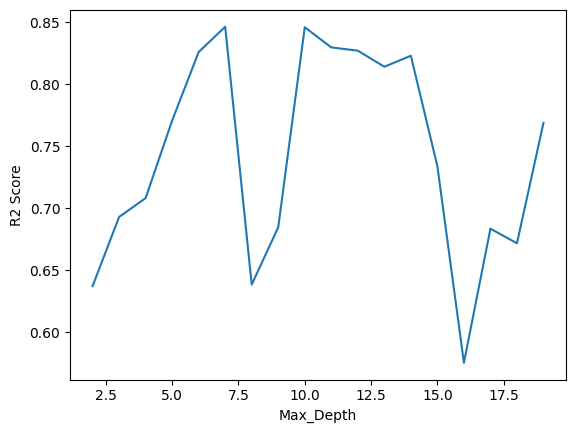

In [42]:
# Visualize which max_depth leads to the highest r2 score
plt.plot(depths, scores["Test Score"])
plt.xlabel("Max_Depth")
plt.ylabel("R2 Score");

## Sorting Test Data

In [43]:
sorted_scores = scores.sort_values(by="Test Score", ascending=False)
sorted_scores.head()

,Train Score,Test Score
7,0.958517,0.846377
10,0.986796,0.84601
11,0.9911,0.829736
12,0.995358,0.827102
6,0.942742,0.825985


The highest score has depth of 7.

## Metrics

In [44]:
#metrics
#Mean Absolute Error
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}\n")
#Mean Square Error
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}\n")
#Root Square Mean Error
train_rsme = mean_squared_error(y_train, train_preds, squared=False)
test_rsme = mean_squared_error(y_test, test_preds, squared=False)
print(f"Train RSME: {train_rsme}")
print(f"Test RSME: {test_rsme}")

Training MAE: 0.00026385224274406706
Test MAE: 2.8011811023622046

Training MSE: 1.3192612137203541e-05
Test MSE: 16.186988188976382

Train RSME: 0.0036321635614607914
Test RSME: 4.023305629575807


_____

# Bagged Trees

## Instantiate and Fit

In [45]:
#Creating Bagging Instance
bag_tree = BaggingRegressor(random_state=42)
#Fitting Training to Bag
bag_tree.fit(X_train,y_train)

BaggingRegressor(random_state=42)

In [46]:
bag_tree.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Predict Y

In [47]:
# Predicting Training and Testing
train_preds = bag_tree.predict(X_train)
test_preds = bag_tree.predict(X_test)

##R2 Score

In [48]:
#Getting R2 score
train_score = r2_score(y_train, train_preds)
test_score = r2_score(y_test, test_preds)
print(f"Train Score {train_score}")
print(f"Test Score {test_score}")

Train Score 0.9606756023782893
Test Score 0.8204208271364619


## For Loop, Bagging Tree

In [49]:
# List of estimator values
estimators = [10, 20, 30, 40, 50, 100]
#Creating dataframe to store scores
scores = pd.DataFrame(index=estimators, columns=["Train Score", "Test Score"])
# Iterate through the values to find the best number of estimators
for num_estimator in estimators:
    #Instantiating and Fitting
    bag_reg = BaggingRegressor(n_estimators=num_estimator, random_state=42)
    bag_reg.fit(X_train, y_train)
    #Making predictions
    train_preds = bag_reg.predict(X_train)
    test_preds = bag_reg.predict(X_test)
    #R2 score
    train_score = r2_score(y_train, train_preds) 
    test_score = r2_score(y_test, test_preds)
    #Putting score in df
    scores.loc[num_estimator, "Train Score"] = train_score
    scores.loc[num_estimator, "Test Score"] = test_score
    print(f"The num estimator: {num_estimator} ")
    print(f" - Train Score {train_score.round(3)}.")
    print(f" - Test Score {test_score.round(3)}.")

The num estimator: 10 
 - Train Score 0.961.
 - Test Score 0.82.
The num estimator: 20 
 - Train Score 0.97.
 - Test Score 0.831.
The num estimator: 30 
 - Train Score 0.973.
 - Test Score 0.831.
The num estimator: 40 
 - Train Score 0.974.
 - Test Score 0.834.
The num estimator: 50 
 - Train Score 0.975.
 - Test Score 0.834.
The num estimator: 100 
 - Train Score 0.977.
 - Test Score 0.833.


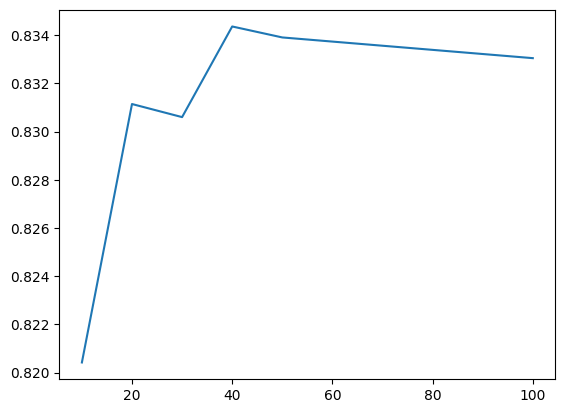

In [50]:
#Visualizing Scores
plt.plot(scores["Test Score"]);
plt.show() 

## Sorting Test Data

In [51]:
#Sorting to find highest train/test scores
scores_sorted = scores.sort_values(by="Test Score", ascending=False)
scores_sorted

,Train Score,Test Score
40,0.97395,0.834365
50,0.975185,0.83391
100,0.977246,0.833051
20,0.9701,0.831147
30,0.973401,0.830604
10,0.960676,0.820421


The highest score is 40th estimator (trees).

## Metrics

In [52]:
#metrics
#Mean Absolute Error
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}\n")
#Mean Square Error
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}\n")
#Root Square Mean Error
train_rsme = mean_squared_error(y_train, train_preds, squared=False)
test_rsme = mean_squared_error(y_test, test_preds, squared=False)
print(f"Train RSME: {train_rsme}")
print(f"Test RSME: {test_rsme}")

Training MAE: 0.9470237467018455
Test MAE: 2.2040236220472456

Training MSE: 2.0178998575197875
Test MSE: 11.69097517322835

Train RSME: 1.420528020673928
Test RSME: 3.4192068046885304


------

# Random Forest Regression

##Instantiate model

In [53]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##Predict y

In [54]:
#Using rf to predict
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

## R2 Score


In [55]:
#Getting R2 scores
train_score = r2_score(y_train, train_preds) 
test_score = r2_score(y_test, test_preds)

## Getting Depth from RandomForestRegressor

In [56]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

23

## For Loop, Random Forest Regression

In [57]:
#Listing the depths to loop thru
depths = range(1,max(est_depths))
#Make a datafram for the values
scores = pd.DataFrame(index=depths, columns=["Train Score", "Test Score"])
#Looping thru depths
for depth in depths:
    #Instantiate RF
    model = RandomForestRegressor(random_state=42, max_depth=depth)
    #Fit the model to training data
    model.fit(X_train, y_train)
    # Make predictions on training and test data
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    #R2 Score
    train_score = r2_score(y_train, train_preds)
    test_score = r2_score(y_test, test_preds)
    #Store in DF
    scores.loc[depth, "Train Score"] = train_score
    scores.loc[depth, "Test Score"] = test_score
    #Print Results
    print(f"The depth is {depth}")
    print(f" - Training Score: {train_score.round(3)}.")
    print(f" - Test Score: {test_score.round(3)}.")

The depth is 1
 - Training Score: 0.607.
 - Test Score: 0.512.
The depth is 2
 - Training Score: 0.775.
 - Test Score: 0.706.
The depth is 3
 - Training Score: 0.862.
 - Test Score: 0.75.
The depth is 4
 - Training Score: 0.904.
 - Test Score: 0.774.
The depth is 5
 - Training Score: 0.931.
 - Test Score: 0.812.
The depth is 6
 - Training Score: 0.949.
 - Test Score: 0.823.
The depth is 7
 - Training Score: 0.96.
 - Test Score: 0.831.
The depth is 8
 - Training Score: 0.967.
 - Test Score: 0.822.
The depth is 9
 - Training Score: 0.971.
 - Test Score: 0.829.
The depth is 10
 - Training Score: 0.974.
 - Test Score: 0.835.
The depth is 11
 - Training Score: 0.975.
 - Test Score: 0.832.
The depth is 12
 - Training Score: 0.976.
 - Test Score: 0.828.
The depth is 13
 - Training Score: 0.977.
 - Test Score: 0.828.
The depth is 14
 - Training Score: 0.976.
 - Test Score: 0.83.
The depth is 15
 - Training Score: 0.977.
 - Test Score: 0.832.
The depth is 16
 - Training Score: 0.977.
 - Test Sc

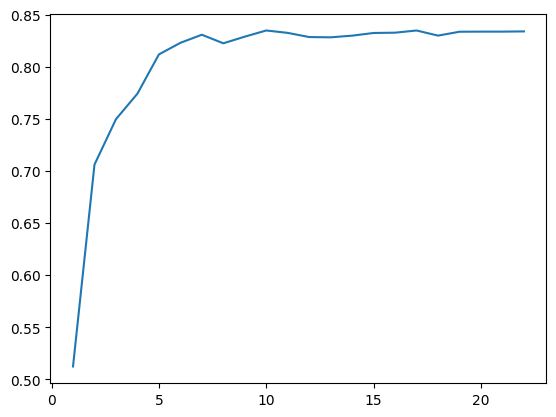

In [58]:
# Plot the scores
plt.plot(scores['Test Score']);

## Sorting Scores

In [59]:
sorted_scores = scores.sort_values(by="Test Score", ascending=False)
sorted_scores.head()

,Train Score,Test Score
10,0.973927,0.834747
17,0.977102,0.834732
22,0.977134,0.83386
20,0.977103,0.833637
21,0.977131,0.833636


The top score is on 10th Tree Depth.

## Metrics

In [60]:
#metrics
#Mean Absolute Error
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}\n")
#Mean Square Error
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}\n")
#Root Square Mean Error
train_rsme = mean_squared_error(y_train, train_preds, squared=False)
test_rsme = mean_squared_error(y_test, test_preds, squared=False)
print(f"Train RSME: {train_rsme}")
print(f"Test RSME: {test_rsme}")

Training MAE: 0.953612137203164
Test MAE: 2.208307086614173

Training MSE: 2.027792345646436
Test MSE: 11.634291503937003

Train RSME: 1.4240057393305816
Test RSME: 3.4109077243362953


#Regression Metrics

Decision Tree Results:
* Depth of Tree = 7	
* Training R2 Score = 0.958517	
* Test R2 Score = 0.846377
---
* Training MAE: 0.00026385224274406706
* Test MAE: 2.8011811023622046
---
* Training MSE: 1.3192612137203541e-05
* Test MSE: 16.186988188976382
---
* Train RSME: 0.0036321635614607914
* Test RSME: 4.023305629575807


Bagged Tree:
* Estimators = 40	
* Training R2 Score = 0.97395	
* Test R2 Score = 0.834365
---
* Training MAE: 0.9470237467018455
* Test MAE: 2.2040236220472456
---
* Training MSE: 2.0178998575197875
* Test MSE: 11.69097517322835
---
* Train RSME: 1.420528020673928
* Test RSME: 3.4192068046885304


Random Forest Regression:
* Depth of Tree = 10	
* Training R2 Score = 0.973927	
* Test R2 Score = 0.834747
---
* Training MAE: 0.953612137203164
* Test MAE: 2.208307086614173
---
* Training MSE: 2.027792345646436
* Test MSE: 11.634291503937003
---
* Train RSME: 1.4240057393305816
* Test RSME: 3.4109077243362953

Explain in a text cell how your model will perform if deployed by referring to the metrics. Ex. How close can your stakeholders expect its predictions to be to the true value?

The Decision Tree has the better metrics out of our models. It has a higher R2 score, which means we can more accurately explain the different variance between actual y and predicted y. The Decision Tree has an overall lower rates of errors (MAE, MSE, and RSME). With the combination of R2 and errors scores, the Decision Tree makes for the best predictive model to use.